In [ ]:
import tensorflow as tf
import os, shutil, pathlib
from tensorflow.keras.utils import image_dataset_from_directory
import keras
from keras import layers
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
original_dir = pathlib.Path("/content/drive/My Drive/DSP566_FinalProjectFolder/Data/dataset-resized")
new_base_dir = pathlib.Path("/content/drive/My Drive/DSP566_FinalProjectFolder/Data/TrashDataSplits")

#### Subsets (Don't rerun)

In [ ]:
def make_subset(subset_name, start_index, end_index):
    for category in ("cardboard", "glass", "metal", "paper", "plastic", "trash"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / category / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=90)
make_subset("validation", start_index=91, end_index=110)
make_subset("test", start_index=111, end_index=130)

### Setsplits

In [ ]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(512, 384),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(512, 384),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(512, 384),
    batch_size=32)

Found 534 files belonging to 6 classes.
Found 114 files belonging to 6 classes.
Found 114 files belonging to 6 classes.


In [ ]:
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,
                                              restore_best_weights= True,
                                              start_from_epoch = 10)

# Original Models

## Original Model (Funnel In)

In [ ]:
inputs = Input(shape=(512, 384, 3))
x = inputs
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
outputs = Dense(6, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=40,
                    callbacks=[earlystopping])
history_dict = history.history

Epoch 1/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 187s 10s/step - accuracy: 0.1472 - loss: 1.8132 - val_accuracy: 0.1842 - val_loss: 1.7546
Epoch 2/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 375ms/step - accuracy: 0.2106 - loss: 1.7509 - val_accuracy: 0.4035 - val_loss: 1.6850
Epoch 3/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 374ms/step - accuracy: 0.2502 - loss: 1.7235 - val_accuracy: 0.3947 - val_loss: 1.6474
Epoch 4/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 383ms/step - accuracy: 0.2999 - loss: 1.7160 - val_accuracy: 0.4825 - val_loss: 1.6214
Epoch 5/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 420ms/step - accuracy: 0.3433 - loss: 1.6854 - val_accuracy: 0.2368 - val_loss: 1.7271
Epoch 6/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 379ms/step - accuracy: 0.2842 - loss: 1.7059 - val_accuracy: 0.3509 - val_loss: 1.6385
Epoch 7/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 380ms/step - accuracy: 0.3562 - loss: 1.6136 - val_accuracy: 0.3509 - val_loss: 1.5758
Epoch 8/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 379ms/step - accuracy: 0.4476 - loss: 1.5527 - val_accurac

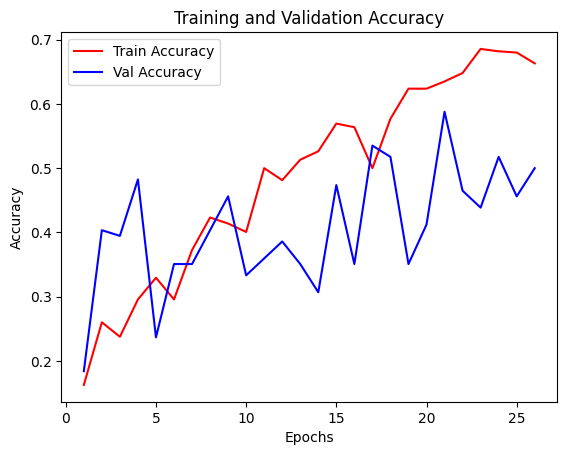

In [ ]:
sequence = range(1, len(history_dict['accuracy']) + 1, 1)
plt.plot(sequence, history_dict['accuracy'], 'r', label='Train Accuracy')
plt.plot(sequence, history_dict['val_accuracy'], 'b', label='Val Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

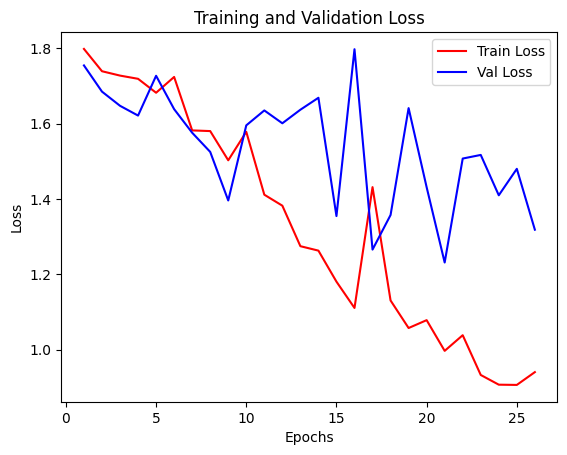

In [ ]:
plt.plot(sequence, history_dict['loss'], 'r', label='Train Loss')
plt.plot(sequence, history_dict['val_loss'], 'b', label='Val Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 7s/step - accuracy: 0.3281 - loss: 1.7913
Test Loss: 1.757429838180542
Test Accuracy: 0.3333333432674408


## Original Model (Funnel Out)

In [ ]:
inputs = Input(shape=(512, 384, 3))
x = inputs
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
outputs = Dense(6, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 512, 384, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 512, 384, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 510, 382, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 255, 191, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 253, 189, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 126, 94, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 124, 92, 128)        │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 62, 46, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 365056)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │       2,190,342 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,283,590 (8.71 MB)

 Trainable params: 2,283,590 (8.71 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=40,
                    callbacks=[earlystopping])
history_dict = history.history

Epoch 1/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.1583 - loss: 1.8556 - val_accuracy: 0.2632 - val_loss: 1.7646
Epoch 2/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 266ms/step - accuracy: 0.2364 - loss: 1.7535 - val_accuracy: 0.4035 - val_loss: 1.7175
Epoch 3/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - accuracy: 0.3471 - loss: 1.7114 - val_accuracy: 0.3772 - val_loss: 1.6838
Epoch 4/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - accuracy: 0.3216 - loss: 1.6847 - val_accuracy: 0.2807 - val_loss: 1.6593
Epoch 5/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 264ms/step - accuracy: 0.3454 - loss: 1.6346 - val_accuracy: 0.1930 - val_loss: 1.8044
Epoch 6/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - accuracy: 0.3447 - loss: 1.6204 - val_accuracy: 0.1667 - val_loss: 1.9396
Epoch 7/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 202ms/step - accuracy: 0.3787 - loss: 1.6450 - val_accuracy: 0.4825 - val_loss: 1.4690
Epoch 8/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 222ms/step - accuracy: 0.4007 - loss: 1.5163 - val_accuracy: 0.4

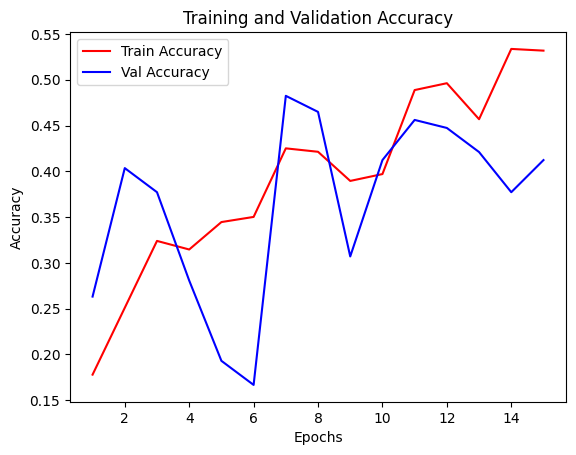

In [ ]:
sequence = range(1, len(history_dict['accuracy']) + 1, 1)
plt.plot(sequence, history_dict['accuracy'], 'r', label='Train Accuracy')
plt.plot(sequence, history_dict['val_accuracy'], 'b', label='Val Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

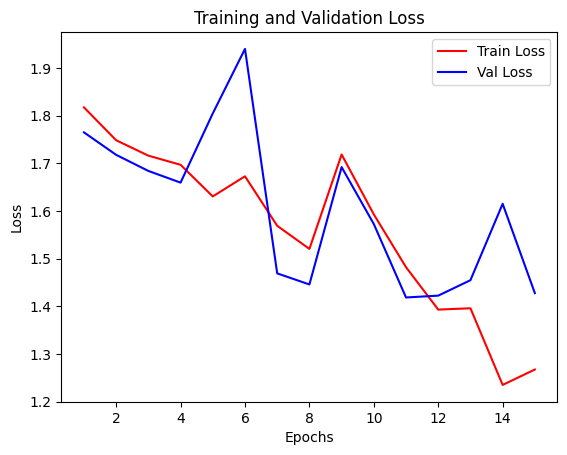

In [ ]:
plt.plot(sequence, history_dict['loss'], 'r', label='Train Loss')
plt.plot(sequence, history_dict['val_loss'], 'b', label='Val Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.2218 - loss: 1.7029
Test Loss: 1.6789518594741821
Test Accuracy: 0.2368421107530594


# Regularization Methods

## Batch Normalization Test

In [ ]:
inputs = Input(shape=(512, 384, 3))
x = inputs
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
outputs = Dense(6, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=40,
                    callbacks=[earlystopping])
history_dict = history.history

Epoch 1/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 455ms/step - accuracy: 0.2256 - loss: 5.1848 - val_accuracy: 0.1667 - val_loss: 1.9258
Epoch 2/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step - accuracy: 0.3955 - loss: 1.5228 - val_accuracy: 0.1667 - val_loss: 2.0673
Epoch 3/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 197ms/step - accuracy: 0.5324 - loss: 1.2539 - val_accuracy: 0.3246 - val_loss: 1.8122
Epoch 4/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 303ms/step - accuracy: 0.5755 - loss: 1.1297 - val_accuracy: 0.2719 - val_loss: 1.9813
Epoch 5/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - accuracy: 0.6378 - loss: 1.0324 - val_accuracy: 0.3158 - val_loss: 1.7774
Epoch 6/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - accuracy: 0.6411 - loss: 1.0959 - val_accuracy: 0.2807 - val_loss: 1.7163
Epoch 7/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 226ms/step - accuracy: 0.7258 - loss: 0.7988 - val_accuracy: 0.2456 - val_loss: 1.6988
Epoch 8/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - accuracy: 0.8192 - loss: 0.5406 - val_accuracy: 0

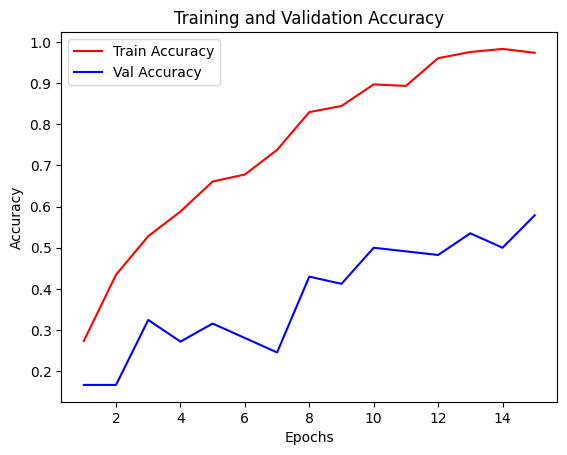

In [ ]:
sequence = range(1, len(history_dict['accuracy']) + 1, 1)
plt.plot(sequence, history_dict['accuracy'], 'r', label='Train Accuracy')
plt.plot(sequence, history_dict['val_accuracy'], 'b', label='Val Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

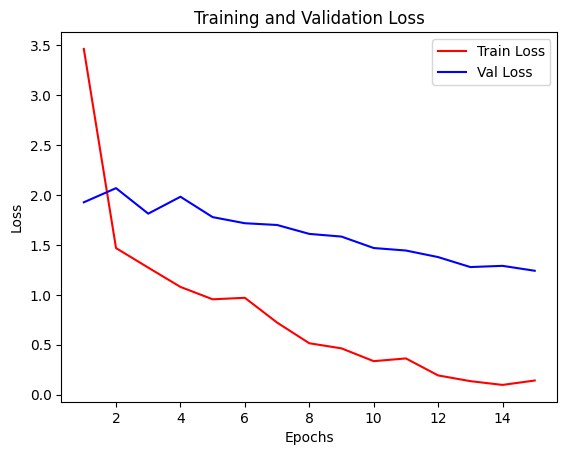

In [ ]:
plt.plot(sequence, history_dict['loss'], 'r', label='Train Loss')
plt.plot(sequence, history_dict['val_loss'], 'b', label='Val Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.3376 - loss: 1.6401
Test Loss: 1.6309483051300049
Test Accuracy: 0.359649121761322


## L2 Regularizer Test

In [ ]:
inputs = Input(shape=(512, 384, 3))
x = inputs
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Dense(64, activation= 'relu', kernel_regularizer= keras.regularizers.l2(.01))(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
outputs = Dense(6, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=40,
                    callbacks=[earlystopping])
history_dict = history.history

Epoch 1/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.1739 - loss: 2.2168 - val_accuracy: 0.1667 - val_loss: 2.1798
Epoch 2/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 245ms/step - accuracy: 0.2138 - loss: 2.1664 - val_accuracy: 0.1754 - val_loss: 2.1726
Epoch 3/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 275ms/step - accuracy: 0.3025 - loss: 2.0952 - val_accuracy: 0.2807 - val_loss: 2.1610
Epoch 4/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 247ms/step - accuracy: 0.3538 - loss: 2.1128 - val_accuracy: 0.2105 - val_loss: 2.0876
Epoch 5/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 246ms/step - accuracy: 0.3247 - loss: 2.1107 - val_accuracy: 0.4474 - val_loss: 2.0628
Epoch 6/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 276ms/step - accuracy: 0.3878 - loss: 2.0411 - val_accuracy: 0.4035 - val_loss: 1.9025
Epoch 7/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 246ms/step - accuracy: 0.3591 - loss: 1.9817 - val_accuracy: 0.3860 - val_loss: 1.8748
Epoch 8/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 247ms/step - accuracy: 0.4311 - loss: 1.9055 - val_accuracy: 0.4

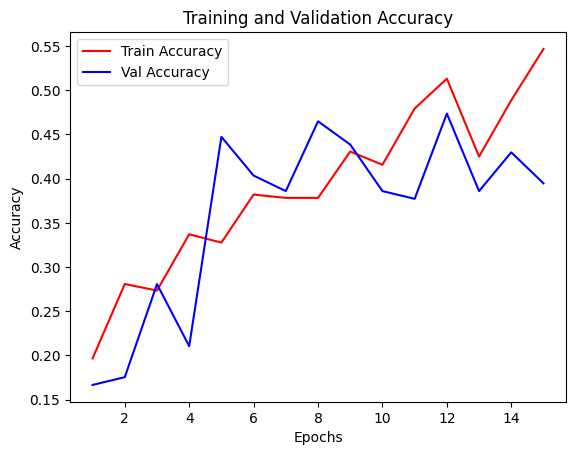

In [ ]:
sequence = range(1, len(history_dict['accuracy']) + 1, 1)
plt.plot(sequence, history_dict['accuracy'], 'r', label='Train Accuracy')
plt.plot(sequence, history_dict['val_accuracy'], 'b', label='Val Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

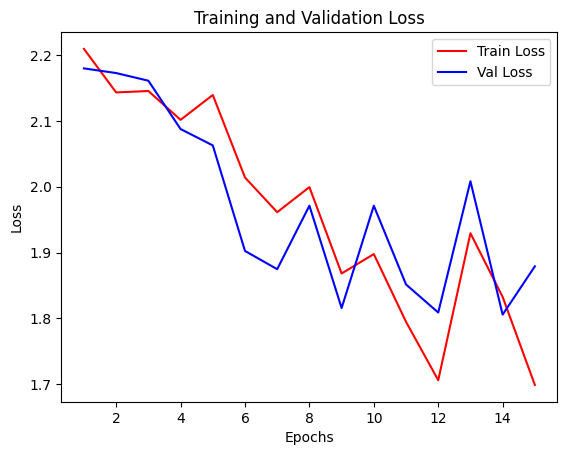

In [ ]:
plt.plot(sequence, history_dict['loss'], 'r', label='Train Loss')
plt.plot(sequence, history_dict['val_loss'], 'b', label='Val Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.2643 - loss: 2.2046
Test Loss: 2.2129781246185303
Test Accuracy: 0.25438597798347473


## L1 Regularizer Test

In [ ]:
inputs = Input(shape=(512, 384, 3))
x = inputs
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Dense(64, activation= 'relu', kernel_regularizer= keras.regularizers.l1(.01))(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
outputs = Dense(6, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=40,
                    callbacks=[earlystopping])
history_dict = history.history

Epoch 1/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 441ms/step - accuracy: 0.1768 - loss: 4.4075 - val_accuracy: 0.1667 - val_loss: 4.3261
Epoch 2/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.2113 - loss: 4.3060 - val_accuracy: 0.1667 - val_loss: 4.2824
Epoch 3/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 246ms/step - accuracy: 0.2376 - loss: 4.2595 - val_accuracy: 0.2544 - val_loss: 4.1879
Epoch 4/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 277ms/step - accuracy: 0.3563 - loss: 4.1820 - val_accuracy: 0.1667 - val_loss: 4.1730
Epoch 5/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 255ms/step - accuracy: 0.3311 - loss: 4.1010 - val_accuracy: 0.4035 - val_loss: 4.0003
Epoch 6/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 255ms/step - accuracy: 0.3588 - loss: 4.0183 - val_accuracy: 0.2895 - val_loss: 4.0489
Epoch 7/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 312ms/step - accuracy: 0.2856 - loss: 4.0359 - val_accuracy: 0.4737 - val_loss: 3.8470
Epoch 8/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 246ms/step - accuracy: 0.4388 - loss: 3.8452 - val_accuracy: 0.

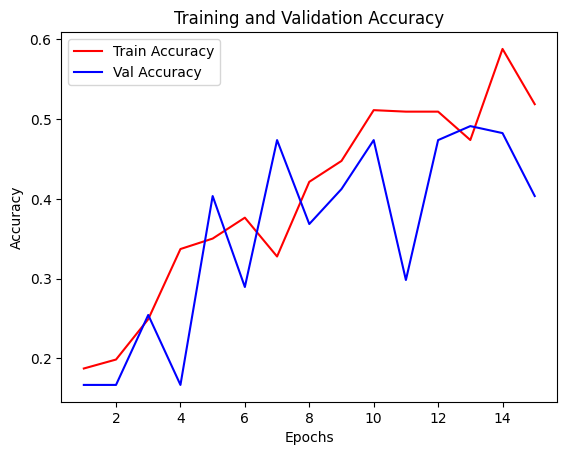

In [ ]:
sequence = range(1, len(history_dict['accuracy']) + 1, 1)
plt.plot(sequence, history_dict['accuracy'], 'r', label='Train Accuracy')
plt.plot(sequence, history_dict['val_accuracy'], 'b', label='Val Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

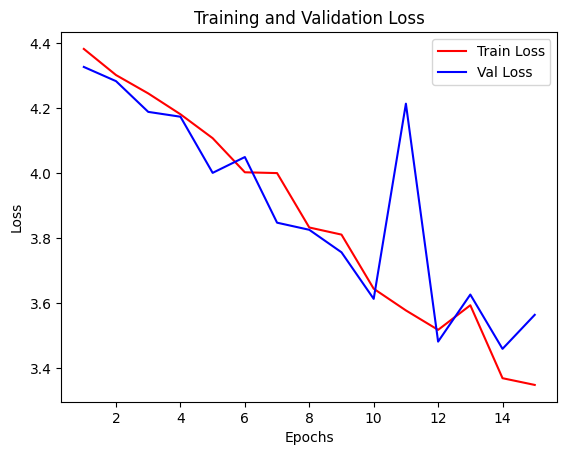

In [ ]:
plt.plot(sequence, history_dict['loss'], 'r', label='Train Loss')
plt.plot(sequence, history_dict['val_loss'], 'b', label='Val Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.1712 - loss: 4.5829
Test Loss: 4.610139846801758
Test Accuracy: 0.17543859779834747


## L1 and L2 Regularizer

In [ ]:
inputs = Input(shape=(512, 384, 3))
x = inputs
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Dense(64, activation= 'relu', kernel_regularizer= keras.regularizers.L1L2(.01, .01))(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
outputs = Dense(6, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=40,
                    callbacks=[earlystopping])
history_dict = history.history

Epoch 1/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 443ms/step - accuracy: 0.1595 - loss: 4.8864 - val_accuracy: 0.1667 - val_loss: 4.7740
Epoch 2/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 275ms/step - accuracy: 0.2107 - loss: 4.7434 - val_accuracy: 0.5175 - val_loss: 4.6222
Epoch 3/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 251ms/step - accuracy: 0.2847 - loss: 4.6751 - val_accuracy: 0.4298 - val_loss: 4.5453
Epoch 4/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 251ms/step - accuracy: 0.3610 - loss: 4.5174 - val_accuracy: 0.1667 - val_loss: 4.5942
Epoch 5/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 298ms/step - accuracy: 0.2378 - loss: 4.5534 - val_accuracy: 0.2456 - val_loss: 4.4910
Epoch 6/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 250ms/step - accuracy: 0.3261 - loss: 4.4336 - val_accuracy: 0.3772 - val_loss: 4.3473
Epoch 7/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 245ms/step - accuracy: 0.4261 - loss: 4.2917 - val_accuracy: 0.2719 - val_loss: 4.4951
Epoch 8/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 315ms/step - accuracy: 0.2950 - loss: 4.5735 - val_accuracy: 0

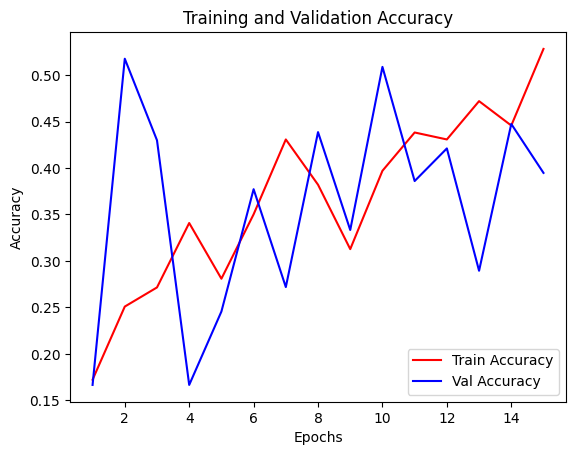

In [ ]:
sequence = range(1, len(history_dict['accuracy']) + 1, 1)
plt.plot(sequence, history_dict['accuracy'], 'r', label='Train Accuracy')
plt.plot(sequence, history_dict['val_accuracy'], 'b', label='Val Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

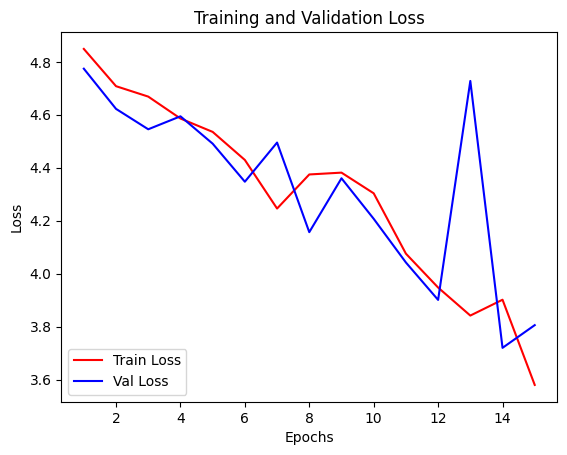

In [ ]:
plt.plot(sequence, history_dict['loss'], 'r', label='Train Loss')
plt.plot(sequence, history_dict['val_loss'], 'b', label='Val Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.3383 - loss: 4.2472
Test Loss: 4.266404628753662
Test Accuracy: 0.35087719559669495


### Dropout

In [ ]:
inputs = Input(shape=(512, 384, 3))
x = inputs
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Dropout(0.4)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Dropout(0.4)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
outputs = Dense(6, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=40,
                    callbacks=[earlystopping])
history_dict = history.history

Epoch 1/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.1542 - loss: 21.8816 - val_accuracy: 0.1667 - val_loss: 1.7918
Epoch 2/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 198ms/step - accuracy: 0.2001 - loss: 1.7847 - val_accuracy: 0.1667 - val_loss: 1.7919
Epoch 3/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 245ms/step - accuracy: 0.1597 - loss: 1.7527 - val_accuracy: 0.1842 - val_loss: 1.6854
Epoch 4/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - accuracy: 0.2174 - loss: 1.6460 - val_accuracy: 0.2544 - val_loss: 1.6026
Epoch 5/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 250ms/step - accuracy: 0.4271 - loss: 1.5073 - val_accuracy: 0.2807 - val_loss: 1.7806
Epoch 6/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - accuracy: 0.4873 - loss: 1.3894 - val_accuracy: 0.2368 - val_loss: 1.9219
Epoch 7/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - accuracy: 0.5590 - loss: 1.2239 - val_accuracy: 0.3860 - val_loss: 1.5502
Epoch 8/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 240ms/step - accuracy: 0.6195 - loss: 1.1025 - val_accuracy: 0.

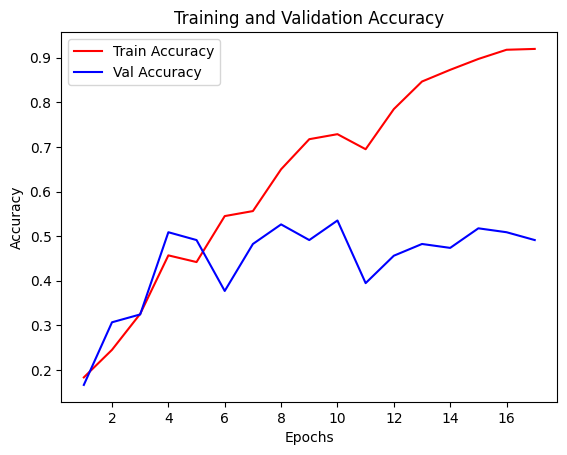

In [ ]:
sequence = range(1, len(history_dict['accuracy']) + 1, 1)
plt.plot(sequence, history_dict['accuracy'], 'r', label='Train Accuracy')
plt.plot(sequence, history_dict['val_accuracy'], 'b', label='Val Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

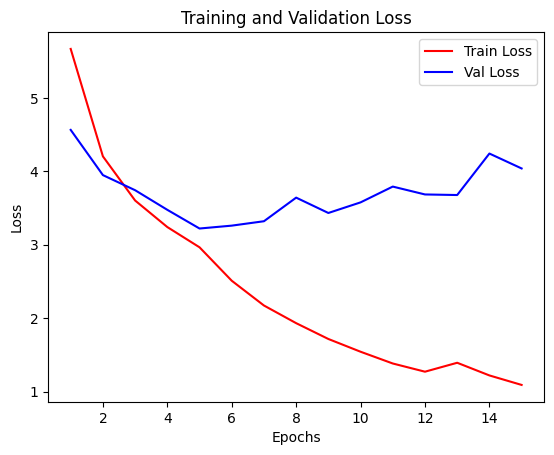

In [ ]:
plt.plot(sequence, history_dict['loss'], 'r', label='Train Loss')
plt.plot(sequence, history_dict['val_loss'], 'b', label='Val Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.2849 - loss: 5.1118
Test Loss: 4.998693943023682
Test Accuracy: 0.2982456088066101


# Optimizers

## SGD

In [ ]:
inputs = Input(shape=(512, 384, 3))
x = inputs
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Dense(64, activation= 'relu', kernel_regularizer= keras.regularizers.L1L2(.01, .01))(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
outputs = Dense(6, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=40,
                    callbacks=[earlystopping])
history_dict = history.history

Epoch 1/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 438ms/step - accuracy: 0.1711 - loss: 4.8112 - val_accuracy: 0.1667 - val_loss: 4.7376
Epoch 2/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 246ms/step - accuracy: 0.2473 - loss: 4.6951 - val_accuracy: 0.2982 - val_loss: 4.6174
Epoch 3/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 301ms/step - accuracy: 0.3329 - loss: 4.5692 - val_accuracy: 0.1579 - val_loss: 4.6133
Epoch 4/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 251ms/step - accuracy: 0.3037 - loss: 4.5275 - val_accuracy: 0.4825 - val_loss: 4.3708
Epoch 5/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 283ms/step - accuracy: 0.3402 - loss: 4.4487 - val_accuracy: 0.4123 - val_loss: 4.3660
Epoch 6/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 251ms/step - accuracy: 0.4025 - loss: 4.3104 - val_accuracy: 0.2895 - val_loss: 4.3058
Epoch 7/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 250ms/step - accuracy: 0.3636 - loss: 4.3239 - val_accuracy: 0.4825 - val_loss: 4.1197
Epoch 8/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 286ms/step - accuracy: 0.4712 - loss: 4.1170 - val_accuracy: 0.

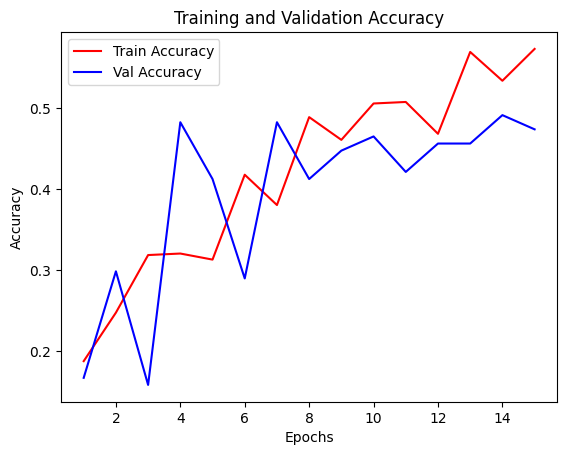

In [ ]:
sequence = range(1, len(history_dict['accuracy']) + 1, 1)
plt.plot(sequence, history_dict['accuracy'], 'r', label='Train Accuracy')
plt.plot(sequence, history_dict['val_accuracy'], 'b', label='Val Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

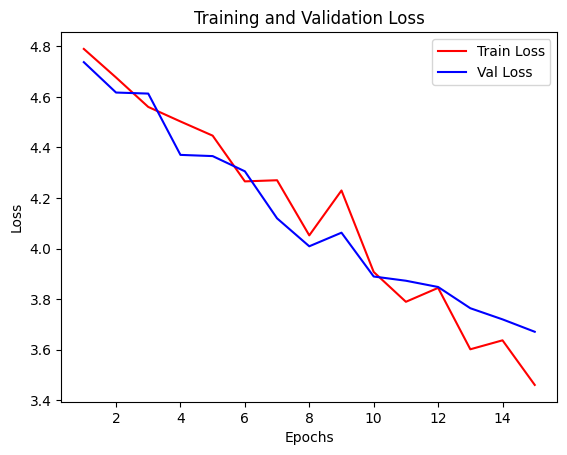

In [ ]:
plt.plot(sequence, history_dict['loss'], 'r', label='Train Loss')
plt.plot(sequence, history_dict['val_loss'], 'b', label='Val Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.2847 - loss: 4.2170
Test Loss: 4.258544445037842
Test Accuracy: 0.24561403691768646


## Adam

In [ ]:
inputs = Input(shape=(512, 384, 3))
x = inputs
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Dense(64, activation= 'relu', kernel_regularizer= keras.regularizers.L1L2(.01, .01))(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
outputs = Dense(6, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=40,
                    callbacks=[earlystopping])
history_dict = history.history

Epoch 1/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 458ms/step - accuracy: 0.1795 - loss: 6.2203 - val_accuracy: 0.2281 - val_loss: 4.3407
Epoch 2/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 254ms/step - accuracy: 0.4252 - loss: 4.0128 - val_accuracy: 0.4737 - val_loss: 3.7082
Epoch 3/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 280ms/step - accuracy: 0.5810 - loss: 3.4271 - val_accuracy: 0.5439 - val_loss: 3.4926
Epoch 4/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 254ms/step - accuracy: 0.6497 - loss: 3.0733 - val_accuracy: 0.5351 - val_loss: 3.2236
Epoch 5/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 266ms/step - accuracy: 0.7268 - loss: 2.6148 - val_accuracy: 0.4474 - val_loss: 3.2786
Epoch 6/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 281ms/step - accuracy: 0.7651 - loss: 2.3734 - val_accuracy: 0.5351 - val_loss: 3.2486
Epoch 7/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 247ms/step - accuracy: 0.8599 - loss: 1.9878 - val_accuracy: 0.5351 - val_loss: 3.1732
Epoch 8/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 268ms/step - accuracy: 0.8824 - loss: 1.6749 - val_accuracy: 0

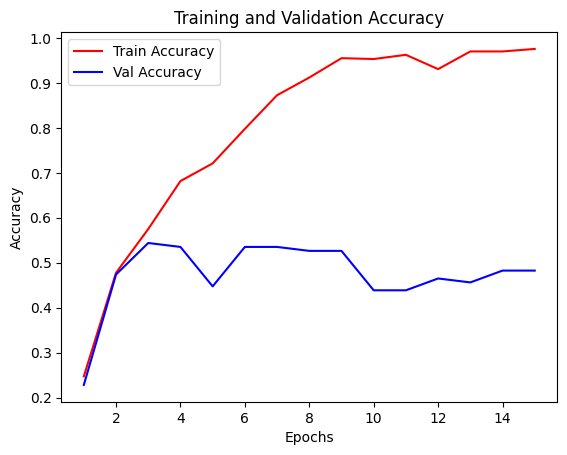

In [ ]:
sequence = range(1, len(history_dict['accuracy']) + 1, 1)
plt.plot(sequence, history_dict['accuracy'], 'r', label='Train Accuracy')
plt.plot(sequence, history_dict['val_accuracy'], 'b', label='Val Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

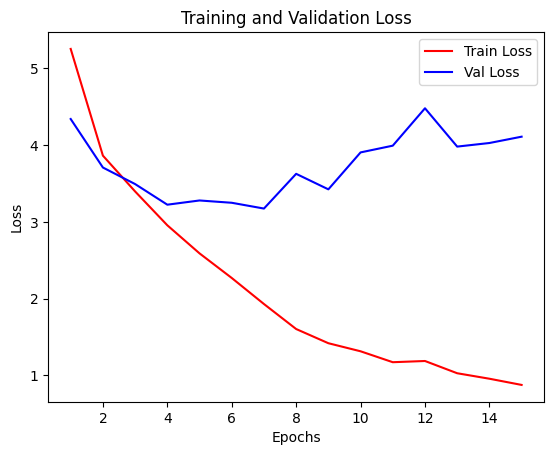

In [ ]:
plt.plot(sequence, history_dict['loss'], 'r', label='Train Loss')
plt.plot(sequence, history_dict['val_loss'], 'b', label='Val Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.3560 - loss: 4.7130
Test Loss: 4.903677940368652
Test Accuracy: 0.35087719559669495


## RMSProp

In [ ]:
inputs = Input(shape=(512, 384, 3))
x = inputs
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Dense(64, activation= 'relu', kernel_regularizer= keras.regularizers.L1L2(.01, .01))(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
outputs = Dense(6, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=40,
                    callbacks=[earlystopping])
history_dict = history.history

Epoch 1/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 378ms/step - accuracy: 0.1435 - loss: 11.0645 - val_accuracy: 0.2807 - val_loss: 4.1873
Epoch 2/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 300ms/step - accuracy: 0.2502 - loss: 4.3739 - val_accuracy: 0.1842 - val_loss: 4.0883
Epoch 3/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 252ms/step - accuracy: 0.2121 - loss: 3.8915 - val_accuracy: 0.2895 - val_loss: 3.8897
Epoch 4/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 271ms/step - accuracy: 0.3633 - loss: 3.5387 - val_accuracy: 0.3684 - val_loss: 3.4647
Epoch 5/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 244ms/step - accuracy: 0.4793 - loss: 3.0938 - val_accuracy: 0.3684 - val_loss: 3.6605
Epoch 6/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 254ms/step - accuracy: 0.5028 - loss: 2.8756 - val_accuracy: 0.4298 - val_loss: 3.4151
Epoch 7/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 275ms/step - accuracy: 0.6371 - loss: 2.4932 - val_accuracy: 0.5175 - val_loss: 2.8737
Epoch 8/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 245ms/step - accuracy: 0.6487 - loss: 2.2363 - val_accuracy: 0

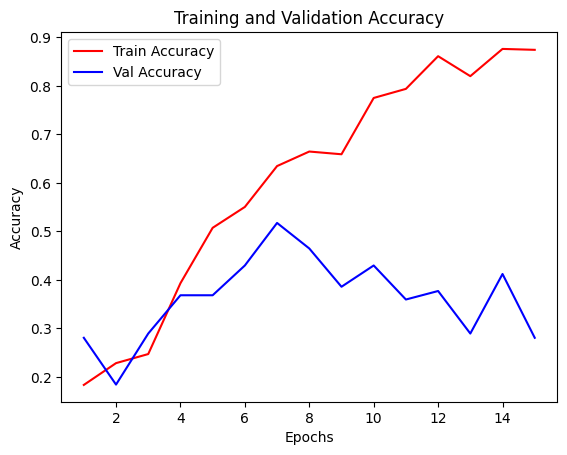

In [ ]:
sequence = range(1, len(history_dict['accuracy']) + 1, 1)
plt.plot(sequence, history_dict['accuracy'], 'r', label='Train Accuracy')
plt.plot(sequence, history_dict['val_accuracy'], 'b', label='Val Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

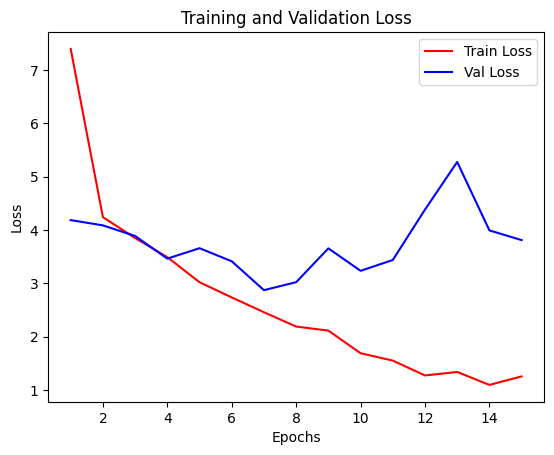

In [ ]:
plt.plot(sequence, history_dict['loss'], 'r', label='Train Loss')
plt.plot(sequence, history_dict['val_loss'], 'b', label='Val Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.2371 - loss: 4.6765
Test Loss: 4.712001800537109
Test Accuracy: 0.22807016968727112


# Pretrained Model

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
resnet_model = ResNet50(input_shape=(512, 384, 3),
                       classes = 6,
                       include_top=False,
                       weights='imagenet')

resnet_model.trainable = False

resnet_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 512, 384, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 518, 390, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 256, 192, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 256, 192, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 256, 192, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 258, 194, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 128, 96, 64)    │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 128, 96, 64)    │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 128, 96, 64)    │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 128, 96, 64)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 128, 96, 64)    │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 128, 96, 64)    │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 128, 96, 64)    │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 128, 96, 256)   │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 128, 96, 256)   │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
def preprocessing(image, label):
    image = tf.keras.applications.resnet50.preprocess_input(image)
    return image, label

train_dataset = train_dataset.map(preprocessing)
validation_dataset = validation_dataset.map(preprocessing)
test_dataset = test_dataset.map(preprocessing)

In [ ]:
import numpy as np


def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        features = resnet_model.predict(images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [ ]:
train_features.shape

(534, 16, 12, 2048)

## Optimizers

### SGD

In [ ]:
inputs = layers.Input(shape=(16, 12, 2048))
x = layers.Flatten()(inputs)
outputs = layers.Dense(6, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='sgd',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [ ]:
history = model.fit(train_features, train_labels,
                    epochs=40, batch_size = 32,
                    validation_data=(val_features, val_labels),
                    callbacks= [earlystopping]
                    )

history_dict = history.history

Epoch 1/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.3173 - loss: 186.3167 - val_accuracy: 0.6579 - val_loss: 77.6429
Epoch 2/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9230 - loss: 9.5114 - val_accuracy: 0.7632 - val_loss: 29.2804
Epoch 3/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9849 - loss: 0.9588 - val_accuracy: 0.7807 - val_loss: 20.8906
Epoch 4/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9965 - loss: 0.0041 - val_accuracy: 0.8070 - val_loss: 21.7906
Epoch 5/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 1.0000 - loss: 1.9797e-08 - val_accuracy: 0.8070 - val_loss: 21.7906
Epoch 6/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 1.0000 - loss: 1.4534e-08 - val_accuracy: 0.8070 - val_loss: 21.7906
Epoch 7/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 1.0000 - loss: 2.2351e-08 - val_accuracy: 0.8070 - val_loss: 21.7906
Epoch 8/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 1.0000 - loss: 4.9701e-08 

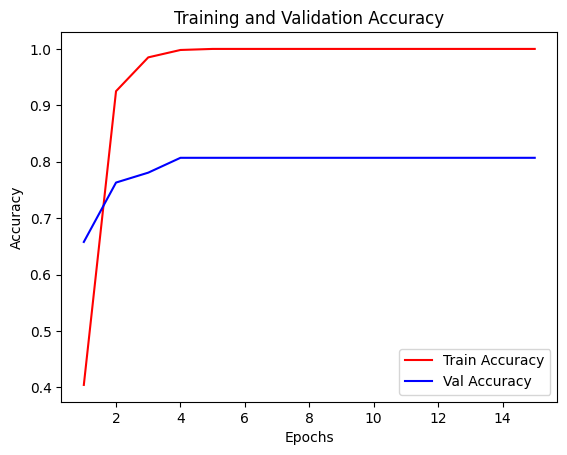

In [ ]:
sequence = range(1, len(history_dict['accuracy']) + 1, 1)
plt.plot(sequence, history_dict['accuracy'], 'r', label='Train Accuracy')
plt.plot(sequence, history_dict['val_accuracy'], 'b', label='Val Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

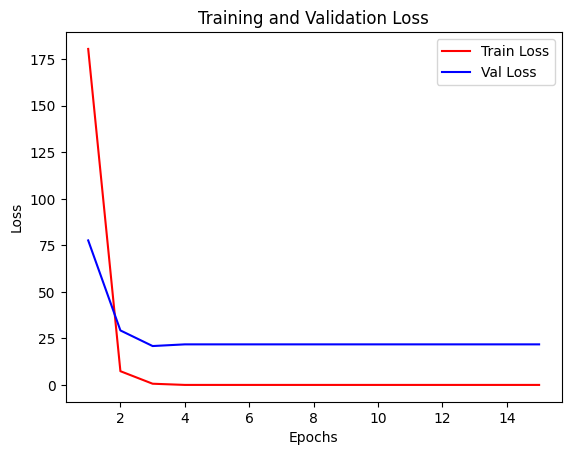

In [ ]:
plt.plot(sequence, history_dict['loss'], 'r', label='Train Loss')
plt.plot(sequence, history_dict['val_loss'], 'b', label='Val Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_features, test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6824 - loss: 33.6395
Test Loss: 32.708919525146484
Test Accuracy: 0.6929824352264404


### Adam

In [ ]:
inputs = layers.Input(shape=(16, 12, 2048))
x = layers.Flatten()(inputs)
outputs = layers.Dense(6, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)


model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [ ]:
history = model.fit(train_features, train_labels,
                    epochs=40, batch_size = 32,
                    validation_data=(val_features, val_labels),
                    callbacks= [earlystopping]
                    )

history_dict = history.history

Epoch 1/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.4371 - loss: 19.4941 - val_accuracy: 0.7105 - val_loss: 14.0622
Epoch 2/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9523 - loss: 1.7503 - val_accuracy: 0.7456 - val_loss: 12.6713
Epoch 3/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9820 - loss: 0.2692 - val_accuracy: 0.7544 - val_loss: 11.4421
Epoch 4/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9856 - loss: 0.3582 - val_accuracy: 0.7456 - val_loss: 16.0002
Epoch 5/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9900 - loss: 0.1556 - val_accuracy: 0.7456 - val_loss: 12.9308
Epoch 6/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9919 - loss: 0.1146 - val_accuracy: 0.7632 - val_loss: 13.4169
Epoch 7/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9981 - loss: 0.0167 - val_accuracy: 0.7281 - val_loss: 17.3873
Epoch 8/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9922 - loss: 0.0494 - val_accuracy: 0

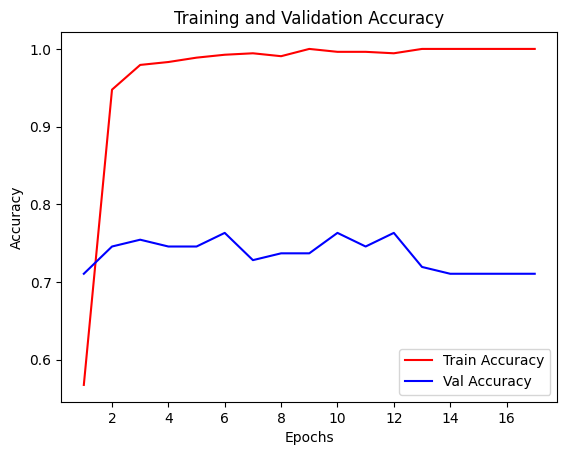

In [ ]:
sequence = range(1, len(history_dict['accuracy']) + 1, 1)
plt.plot(sequence, history_dict['accuracy'], 'r', label='Train Accuracy')
plt.plot(sequence, history_dict['val_accuracy'], 'b', label='Val Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

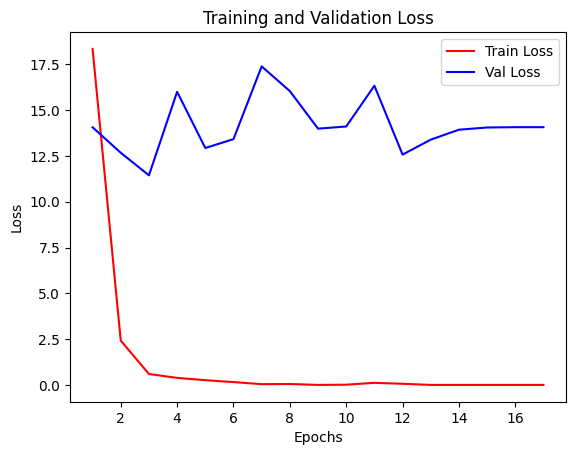

In [ ]:
plt.plot(sequence, history_dict['loss'], 'r', label='Train Loss')
plt.plot(sequence, history_dict['val_loss'], 'b', label='Val Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_features, test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6677 - loss: 20.4179
Test Loss: 21.33689308166504
Test Accuracy: 0.6666666865348816


### RMSProp

In [ ]:
inputs = layers.Input(shape=(16, 12, 2048))
x = layers.Flatten()(inputs)
outputs = layers.Dense(6, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='rmsprop',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [ ]:
history = model.fit(train_features, train_labels,
                    epochs=40, batch_size = 32,
                    validation_data=(val_features, val_labels),
                    callbacks= [earlystopping]
                    )

history_dict = history.history

Epoch 1/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.4009 - loss: 66.7768 - val_accuracy: 0.6930 - val_loss: 19.0570
Epoch 2/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9028 - loss: 3.5241 - val_accuracy: 0.7193 - val_loss: 12.9593
Epoch 3/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9816 - loss: 0.4046 - val_accuracy: 0.6667 - val_loss: 21.6426
Epoch 4/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.9120 - loss: 3.5203 - val_accuracy: 0.7018 - val_loss: 19.4958
Epoch 5/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9704 - loss: 0.9387 - val_accuracy: 0.7368 - val_loss: 19.5506
Epoch 6/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9880 - loss: 0.7834 - val_accuracy: 0.7193 - val_loss: 14.1878
Epoch 7/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9869 - loss: 0.4584 - val_accuracy: 0.7018 - val_loss: 26.5742
Epoch 8/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9828 - loss: 0.2429 - val_accuracy: 0

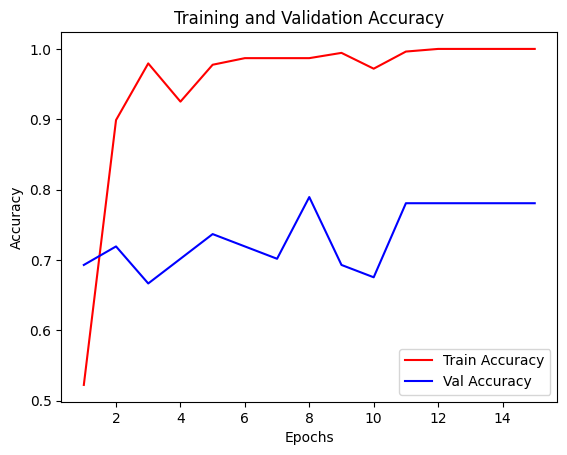

In [ ]:
sequence = range(1, len(history_dict['accuracy']) + 1, 1)
plt.plot(sequence, history_dict['accuracy'], 'r', label='Train Accuracy')
plt.plot(sequence, history_dict['val_accuracy'], 'b', label='Val Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

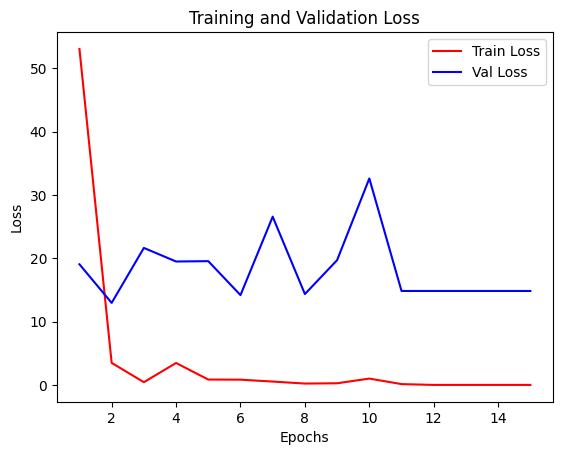

In [ ]:
plt.plot(sequence, history_dict['loss'], 'r', label='Train Loss')
plt.plot(sequence, history_dict['val_loss'], 'b', label='Val Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_features, test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7242 - loss: 21.7546
Test Loss: 21.755510330200195
Test Accuracy: 0.719298243522644
